In [50]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

%matplotlib inline

In [51]:
philly_points = pd.read_csv('Vacant_Indicators_Points.csv')
philly_points.head()
#https://metadata.phila.gov/#home/datasetdetails/58078697d414285d25b14e3c/representationdetails/59c154f1c8357d22ed035e66/

,X,Y,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_FLAG,VACANT_RANK
0,-75.178904,39.934505,1,2041 REED ST,GREATER DELIVERANCE TEMPL,NaN,VAC LAND COMM. < ACRE,885396760.0,498086,2,CMX-2,19146.0,0.67,0.0,Land,0.67
1,-75.164548,39.988160,2,2233 N UBER ST,CITY OF PHILA,NaN,VAC LAND RES < ACRE,162113701.0,581713,5,RSA-5,19132.0,0.50,0.0,Land,0.50
2,-75.180480,39.978561,3,1460 N MARSTON ST,PHILADELPHIA HOUSING AUTH,NaN,VAC LAND RES < ACRE,292083110.0,415511,5,RSA-5,19121.0,0.50,0.0,Land,0.50
3,-75.186579,40.006852,4,3241 SUGDENS ROW,JORDAN MARIA,NaN,VAC LAND RES < ACRE,382209500.0,557317,4,RSA-5,19129.0,1.00,0.0,Land,1.00
4,-75.238794,39.954902,5,5816 PINE ST,WALSH JAMES,LUBLIN WILLIAM H,ROW 2 STY MASONRY,604178400.0,485528,3,RM-1,19143.0,0.00,1.0,Building,1.00


In [52]:
philly_points.describe()

,X,Y,OBJECTID,OPA_ID,COUNCILDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_RANK
count,36917.000000,36917.000000,36917.00000,3.689600e+04,36917.000000,36595.000000,36915.000000,36917.000000,36915.000000
mean,-75.167337,39.985244,18459.00000,3.431197e+08,4.913211,19131.573330,0.525169,0.150244,0.665391
std,0.041322,0.031944,10657.16428,2.276140e+08,2.175462,11.154188,0.343984,0.252557,0.184587
min,-75.269183,39.883301,1.00000,1.100490e+07,1.000000,19102.000000,0.000000,0.000000,0.500000
25%,-75.189216,39.968623,9230.00000,1.831285e+08,3.000000,19122.000000,0.415000,0.000000,0.500000
50%,-75.165435,39.986638,18459.00000,3.110167e+08,5.000000,19133.000000,0.500000,0.000000,0.670000
75%,-75.144508,39.999227,27688.00000,4.320889e+08,7.000000,19140.000000,0.670000,0.500000,0.670000
max,-74.964149,40.135042,36917.00000,8.886000e+08,10.000000,19154.000000,1.000000,1.000000,1.000000


In [53]:
philly_points.dtypes

X                     float64
Y                     float64
OBJECTID                int64
ADDRESS                object
OWNER1                 object
OWNER2                 object
BLDG_DESC              object
OPA_ID                float64
LNIADDRESSKEY          object
COUNCILDISTRICT         int64
ZONINGBASEDISTRICT     object
ZIPCODE               float64
LAND_RANK             float64
BUILD_RANK            float64
VACANT_FLAG            object
VACANT_RANK           float64
dtype: object

In [54]:
philly_land = pd.read_csv('Vacant_Indicators_land.csv')
philly_land.head()
#https://metadata.phila.gov/#home/datasetdetails/58078697d414285d25b14e3c/representationdetails/58078a80b9e3a26d110fa20e/

,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,Shape__Area,Shape__Length
0,1,2508 CORAL ST,DUONG DEP THI,NaN,VAC LAND RES < ACRE,311103400.0,97735,1,RSA-5,19125.0,0.50,128.351562,58.941479
1,2,1441 S FALLON ST,PHILADELPHIA LAND BANK,NaN,VAC LAND RES < ACRE,273036610.0,284084,3,RSA-5,19143.0,0.67,116.269531,51.521343
2,3,604 E LIPPINCOTT ST,MCIVOR JAMISA,NaN,VAC LAND RES < ACRE,331017100.0,394632,7,RSA-5,19134.0,0.50,112.847656,51.232811
3,4,1629 S TANEY ST,BHATTI SARWAT A,NaN,VAC LAND RES < ACRE,364283000.0,564768,2,RSA-5,19145.0,1.00,103.789062,47.910284
4,5,2434 N BROAD ST,ELEBAH INC,NaN,VAC LAND COMM. < ACRE,885151680.0,50430,5,CMX-2.5,19132.0,0.50,299.125000,99.025594


<AxesSubplot:>

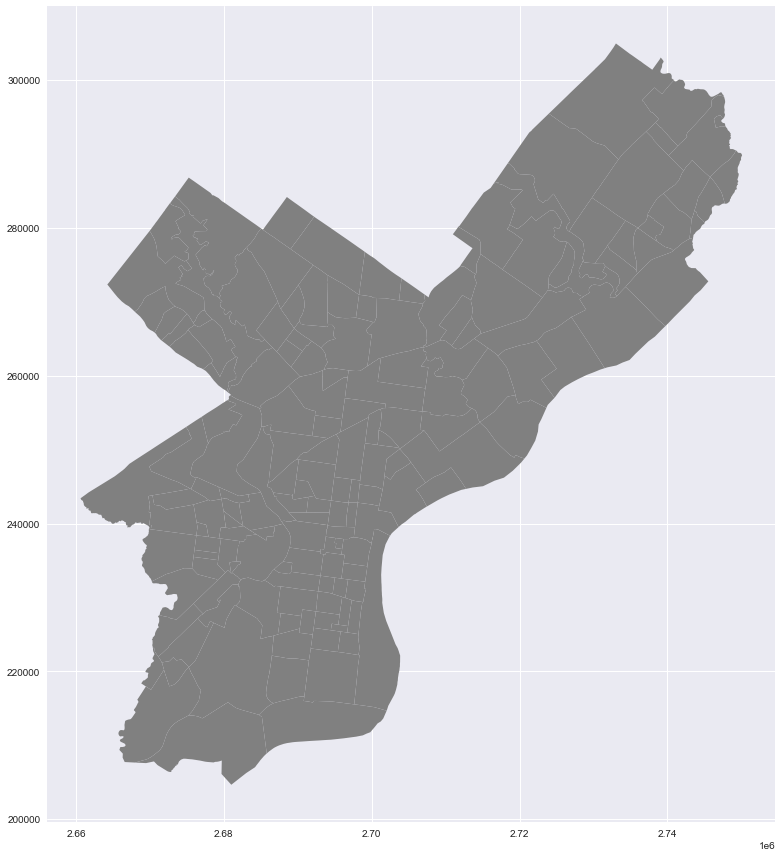

In [55]:
street_map = gpd.read_file("Neighborhoods_Philadelphia.shp")
#Download shape file from here. Download all files under folder "Neighborhoods_philadelphia" and keep in the same folder https://github.com/azavea/geo-data
fig,ax = plt.subplots(figsize =(15,15))
plt.style.use('seaborn')
street_map.plot(ax = ax, color = "grey")


<AxesSubplot:>

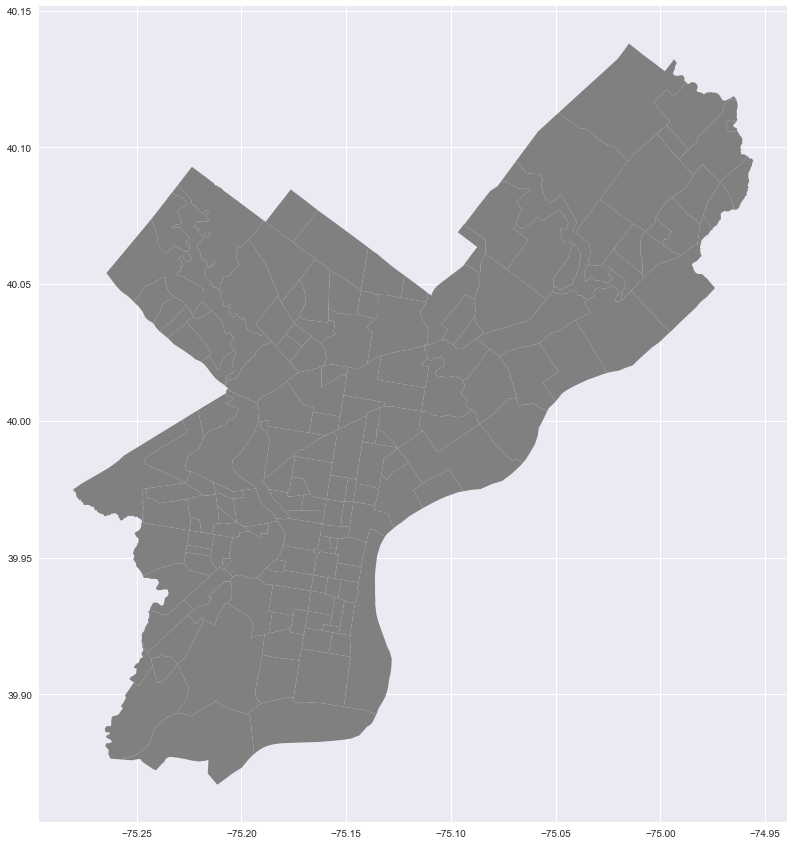

In [56]:
fig,ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).plot(ax = ax, color = "grey")# converting axis to coordiate with longitude and latitude

In [57]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(philly_points["X"], philly_points["Y"])]
geometry[:3]

In [58]:
geo_df = gpd.GeoDataFrame(philly_points,
                            crs = crs,
                            geometry = geometry)

geo_df.head()

/Users/priankaball/Desktop/env_capstone/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,X,Y,OBJECTID,ADDRESS,OWNER1,OWNER2,BLDG_DESC,OPA_ID,LNIADDRESSKEY,COUNCILDISTRICT,ZONINGBASEDISTRICT,ZIPCODE,LAND_RANK,BUILD_RANK,VACANT_FLAG,VACANT_RANK,geometry
0,-75.178904,39.934505,1,2041 REED ST,GREATER DELIVERANCE TEMPL,NaN,VAC LAND COMM. < ACRE,885396760.0,498086,2,CMX-2,19146.0,0.67,0.0,Land,0.67,POINT (-75.17890 39.93451)
1,-75.164548,39.988160,2,2233 N UBER ST,CITY OF PHILA,NaN,VAC LAND RES < ACRE,162113701.0,581713,5,RSA-5,19132.0,0.50,0.0,Land,0.50,POINT (-75.16455 39.98816)
2,-75.180480,39.978561,3,1460 N MARSTON ST,PHILADELPHIA HOUSING AUTH,NaN,VAC LAND RES < ACRE,292083110.0,415511,5,RSA-5,19121.0,0.50,0.0,Land,0.50,POINT (-75.18048 39.97856)
3,-75.186579,40.006852,4,3241 SUGDENS ROW,JORDAN MARIA,NaN,VAC LAND RES < ACRE,382209500.0,557317,4,RSA-5,19129.0,1.00,0.0,Land,1.00,POINT (-75.18658 40.00685)
4,-75.238794,39.954902,5,5816 PINE ST,WALSH JAMES,LUBLIN WILLIAM H,ROW 2 STY MASONRY,604178400.0,485528,3,RM-1,19143.0,0.00,1.0,Building,1.00,POINT (-75.23879 39.95490)


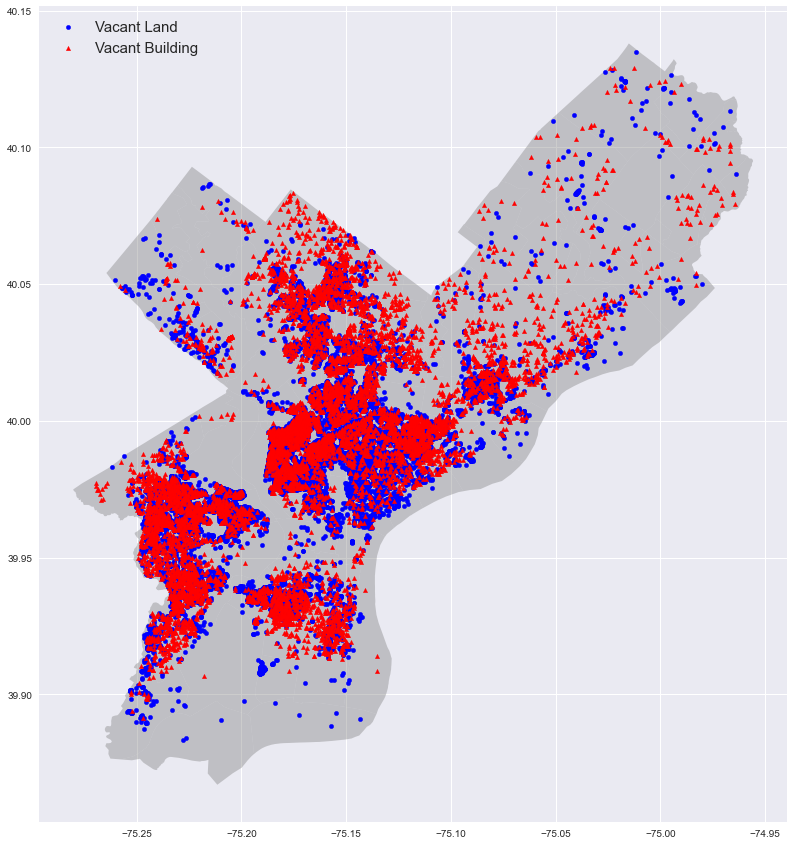

In [59]:
fig, ax = plt.subplots(figsize =(15,15))
street_map.to_crs(epsg = 4326).plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['VACANT_FLAG'] == 'Land'].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Vacant Land")
geo_df[geo_df['VACANT_FLAG'] == 'Building'].plot(ax = ax, markersize = 20, color = "red", marker = "^", label = "Vacant Building")
#geo_df.plot(column = 'BUILD_RANK', ax = ax, alpha = 0.5, legend = True, markersize = 10)
plt.legend(prop = {'size' : 15})
#plt.show()